<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#딥러닝-프레임워크-이야기" data-toc-modified-id="딥러닝-프레임워크-이야기-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>딥러닝 프레임워크 이야기</a></span></li><li><span><a href="#데이터-가져오기" data-toc-modified-id="데이터-가져오기-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>데이터 가져오기</a></span></li><li><span><a href="#scikit-learn" data-toc-modified-id="scikit-learn-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>scikit-learn</a></span></li><li><span><a href="#keras" data-toc-modified-id="keras-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>keras</a></span><ul class="toc-item"><li><span><a href="#Sequential" data-toc-modified-id="Sequential-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Sequential</a></span></li><li><span><a href="#activation" data-toc-modified-id="activation-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>activation</a></span></li><li><span><a href="#compile" data-toc-modified-id="compile-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>compile</a></span><ul class="toc-item"><li><span><a href="#optimizer" data-toc-modified-id="optimizer-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>optimizer</a></span></li><li><span><a href="#loss" data-toc-modified-id="loss-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>loss</a></span></li><li><span><a href="#metrics" data-toc-modified-id="metrics-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>metrics</a></span></li></ul></li><li><span><a href="#fit" data-toc-modified-id="fit-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>fit</a></span><ul class="toc-item"><li><span><a href="#epoch" data-toc-modified-id="epoch-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>epoch</a></span></li></ul></li></ul></li></ul></div>

# [AI 오픈 이노베이션] 기본 저녁반<a class="tocSkip">
GitHub link: [https://github.com/realblack0/ai_lecture_fundamental](https://github.com/realblack0/ai_lecture_fundamental)  
E-Mail: realblack0@gmail.com

## 딥러닝 프레임워크 이야기  

theano : 처음에 왕이었다.  
→ keras : 이론과 코드의 간극을 줄였다. 쓰기 쉽다. 인기를 끌었다.  
→ tensorflow : 구글에서 만들었다. 대학에서 만든 것(theano)보다 기업에서 만든게 더 좋다. 딥러닝 프레임워크의 대세가 된다.  
→ cntk : 마이크로소프트에서도 만들었다.   
→ keras : wrapper 방식으로 만들어졌기 때문에 keras 문법을 쓰면서 내부적으로 theano, tensorflow, cntk를 백엔드로 쓸 수 있다.  
→ torch : 루아 언어 기반, 페이스북에서 만들었다.  
→ pytorch : torch를 python으로 만들었다. 사용하기도 쉬워서 tensorflow의 점유율을 뺏기 시작한다.  
→ keras + tensorflow : 위기를 느낀 구글이 keras를 영입한다. keras가 tensorflow에 흡수된다.  
→ tensorflow 2.0 : tensorflow가 업데이트하면서 사용하기 쉬운 keras를 전면에 내세운다.

TensorFlow로 모델 만드는 방법은 여러가지가 있다. 
- tensor
- estimator
- keras
    - functional
    - sequential
    - class
    

우리는 tensorflow에 내장된 keras부터 배울 것이다.

※ 이번 강의는 [TensorFlow 공식 튜토리얼](https://www.tensorflow.org/tutorials/quickstart/beginner?hl=ko)을 기준으로 진행되었습니다.  
※ tensorflow는 2.x 버전을 이용합니다.

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.0.0'

tensorflow는 기능이 많다. 다 배우는데 6개월 정도 걸린다.

In [3]:
dir(tf)

['AggregationMethod',
 'Assert',
 'CriticalSection',
 'DType',
 'DeviceSpec',
 'GradientTape',
 'Graph',
 'IndexedSlices',
 'IndexedSlicesSpec',
 'Module',
 'Operation',
 'OptionalSpec',
 'RaggedTensor',
 'RaggedTensorSpec',
 'RegisterGradient',
 'SparseTensor',
 'SparseTensorSpec',
 'Tensor',
 'TensorArray',
 'TensorArraySpec',
 'TensorShape',
 'TensorSpec',
 'TypeSpec',
 'UnconnectedGradients',
 'Variable',
 'VariableAggregation',
 'VariableSynchronization',
 '_LazyLoader',
 '__builtins__',
 '__cached__',
 '__compiler_version__',
 '__cxx11_abi_flag__',
 '__doc__',
 '__file__',
 '__git_version__',
 '__loader__',
 '__monolithic_build__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_absolute_import',
 '_api',
 '_division',
 '_forward_module',
 '_importlib',
 '_m',
 '_print_function',
 '_root_estimator',
 '_sys',
 '_top_level_modules',
 '_types',
 'abs',
 'acos',
 'acosh',
 'add',
 'add_n',
 'argmax',
 'argmin',
 'argsort',
 'as_dtype',
 'as_string',
 'asin',

## 데이터 가져오기

In [4]:
from tensorflow.keras.datasets import mnist

데이터는 2-way hold out되어 있다. 

In [5]:
# unpacking
(X_train, y_train), (X_test, y_test) = mnist.load_data()

데이터는 numpy array로 되어 있고, 총 6만개이다.

In [6]:
type(X_train)

numpy.ndarray

In [7]:
X_train.shape

(60000, 28, 28)

데이터는 28 x 28 크기의 이미지들이다. 이미지 데이터이므로 `imshow`로 볼 수 있다.

In [8]:
X_train[0].shape

(28, 28)

In [9]:
import matplotlib.pyplot as plt

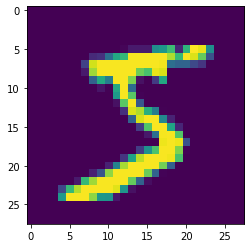

In [10]:
# 손글씨 5 이미지 데이터
plt.imshow(X_train[0])

이미지 데이터는 기계학습에 바로 사용할 수 없다.  
2차원을 1차원으로 바꾸면 기계학습에 사용 가능하다.

In [11]:
X_train.reshape(60000, -1).shape

(60000, 784)

## scikit-learn

scikit에서도 이미지 데이터를 쓸 수 있다. 

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
# 실행 X
# 데이터 6만개가 많아서 오래 걸림
knn = KNeighborsClassifier()
knn.fit(X_train.reshape(60000, -1), y_train)

scikit-learn에서도 딥러닝 쓸 수 있다.  
단, scikit-learn의 딥러닝은 복잡한 건 못한다.

In [14]:
from sklearn.neural_network import MLPClassifier

In [15]:
mlp = MLPClassifier()

In [16]:
# 시간상 실행은 생략
mlp.fit(X_train.reshape(60000, -1), y_train)

## keras

### Sequential

keras에서 모델을 만드는 방법은 3가지가 있는데, 그 중 `Sequential`을 이용하는 방법을 알아보자.  
`Sequential`은 단순한 모델만 만들 수 있다. 
    - 일방향만으로만 foward 가능하다. (양방향 불가)  
    - output도 1개만 출력 가능하다.  

In [17]:
from tensorflow.keras.models import Sequential

In [18]:
# 대문자는 클래스 -> 인스턴스
model = Sequential()

`Sequential`에는 layer를 넣어줘야 한다.  
keras는 기존에 유명한 모델 그대로 가져다 쓸 수 있다.  
`import` 뒤에서 tab 눌러보면 종류가 많다. 계속 발전 중이다.

In [19]:
from tensorflow.keras.layers import Dense

다음 그림을 보면 노드가 서로 완전히 연결(fully connected)되어 있다.  
줄여서 fc layer라고 부르기도 한다.  
촘촘하게(Dense) 연결되어 있다고 해서 `Dense`라고 이름 지어졌다. 

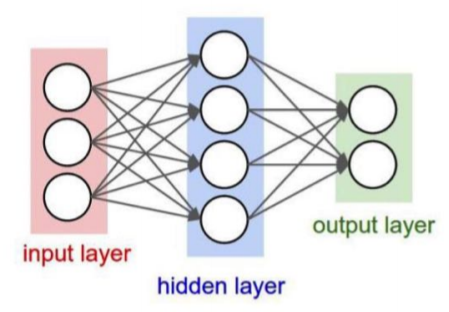

인스턴스해서 사용한다. 인자가 반드시 필요하다.

In [20]:
layer1 = Dense(4) # 노드 개수 4

output layer의 노드 개수는 분류할 target 개수와 같게 한다.   
손글씨 데이터는 숫자 0 ~ 10을 분류하므로 10종이다.

In [21]:
output = Dense(10)

`add` 메소드로 sequential 인스턴스에 layer를 추가한다.

In [22]:
model.add(layer1)

In [23]:
model.add(output) # 순차적으로 add

또는 `Sequetial`을 인스턴스할 때 layer를 한번에 넣을 수도 있다.  

In [24]:
model = Sequential(layers=[layer1, output]) # layers => 복수형 => 리스트로 묶어서

사용법이 간단해서 할당 안하고 바로 추가하기도 한다.

In [25]:
model = Sequential()
model.add(Dense(4))
model.add(Dense(10))

- 일반적으로 레이어 많이 써야 성능 좋다.   
    - 그러나 항상 그렇지는 않다. 무조건 데이터의 특성에 따라 정해진다.  
- 딥러닝은 오비피팅이 잘 일어난다.  
- 오캄의 면도칼 법칙에 따라서 간단한 모델 만드는게 좋다.

In [26]:
model.add(Dense(16))
model.add(Dense(12))
model.add(Dense(10))

`summary`는 모델의 구조를 보여주는 메서드이다. 

In [27]:
# Error
model.summary()

`Sequential`은 첫번째 레이어에 input 모양을 알려줘야 한다.  
앞서 만든 모델은 input_shape을 정해주지 않아서 에러가 발생한 것이다.

In [28]:
model = Sequential()

`input_shape`은 데이터 하나의 모양을 의미한다.  
mnist 데이터를 reshape한 모양을 알려준다.  
반드시 tuple로 넣어줘야 한다.

In [29]:
model.add(Dense(16, input_shape=(784, ))) # 값이 1개인 tuple은 콤마
model.add(Dense(10))

모델에 레이어가 어떻게 쌓여있는지 정리해준다. 

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


※ 주의할 점: 만약 실수로 같은 셀을 또 실행하면 model의 구조가 바뀐다. (mutable은 실수하기 쉽다)

In [31]:
model.add(Dense(16, input_shape=(784, ))) 
model.add(Dense(10))

In [32]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                170       
_________________________________________________________________
dense_9 (Dense)              (None, 16)                176       
_________________________________________________________________
dense_10 (Dense)             (None, 10)                170       
Total params: 13,076
Trainable params: 13,076
Non-trainable params: 0
_________________________________________________________________


나중에 add하지 않고 처음부터 집어 넣으면 실수를 줄일 수 있다.  
구글은 초보자들의 이런 실수를 캐치하고 초보자용 튜토리얼에 넣어두었다.

In [33]:
model = Sequential([
    Dense(16, input_shape=(784, )),
    Dense(10)
])

Param은 업데이트해야하는 요소이다.

In [34]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 16)                12560     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


### activation

activation은 공간을 왜곡하는 역할을 한다.  
복잡한 문제도 해결할 수 있게 된다. 

In [35]:
model = Sequential()
model.add(Dense(16, input_shape=(784, ), activation="relu")) 
model.add(Dense(10)) # output layer도 activation이 있어야하지만, 아직은 그냥 둔다.

---

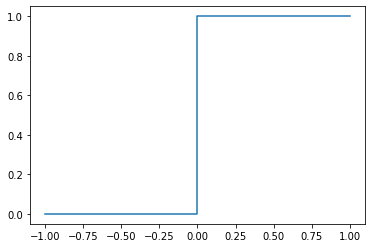

In [36]:
# 처음에 활성함수는 계단함수였다.
# 미분이 불가능해서 학습이 안되는 문제가 있었다.

plt.plot([-1, 0, 0, 1], [0, 0, 1, 1])
plt.show()

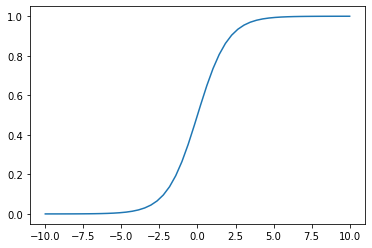

In [37]:
# sigmoid는 미분 가능하다.
# layer를 쌓아도 학습이 가능하다. 

import numpy as np
sigmoid = lambda x:1/(1 + np.exp(-x)) 

x = np.linspace(-10, 10)
y = sigmoid(x)

plt.plot(x, y)
plt.show()

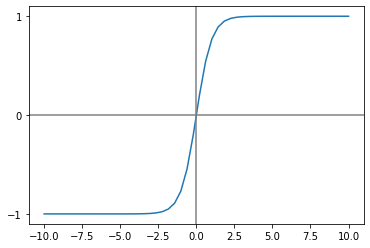

In [38]:
# tanh(하이퍼볼릭 탄젠트)를 쓰면 값이 -1 ~ 1 사이가 된다. 
# 학습 속도가 좀 더 빠른 경향이 있다.
# sigmoid는 값이 0 ~ 1 사이이다.

x = np.linspace(-10, 10)
y = np.tanh(x)

plt.plot(x, y)
plt.yticks([-1, 0, 1])
plt.axhline(color="gray"); plt.axvline(color="gray")
plt.show()

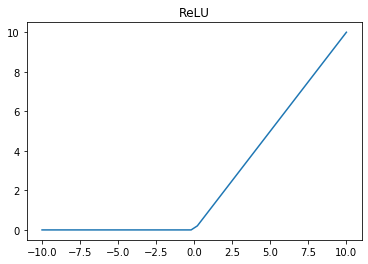

In [39]:
# sigmoid, tanh는 레이어가 깊게 쌓이면 기울기가 소실되는 문제가 있었다. (gradient vanishing)
# 즉, 학습이 안된다. 
# hinton 교수가 ReLU로 해결한다. 
# 딥러닝에서 활성함수는 relu 거의 기본이다.

x = np.linspace(-10, 10)
y = np.clip(x, 0, 100)

plt.title("ReLU")
plt.plot(x, y)
plt.show()

---

iris 데이터를 학습할 keras 모델을 만들어 보자.

In [40]:
from sklearn.datasets import load_iris

In [41]:
X, y = load_iris(return_X_y=True)

In [42]:
model = Sequential([
    Dense(12, input_shape=(4,), activation="relu"), # 첫번째 레이어: input shape을 써줘야 한다.
                                                    # iris는 feature가 4개
    Dense(12, activation="relu"),
    Dense(3, activation="softmax") # 마지막 레이어: classification, regression에 따라서 다르다.
                                   # iris는 target이 3개
])

마지막 output 레이어의 활성함수는 classification, regression에 따라서 다르다.
- classification 
     - 0과 1로 binary(이진) 분류 : activation에 sigmoid 쓴다.
     - multi class 분류: activation에 softmax 쓴다.
 - regression
     - activation 안 쓴다.

In [43]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 12)                60        
_________________________________________________________________
dense_16 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_17 (Dense)             (None, 3)                 39        
Total params: 255
Trainable params: 255
Non-trainable params: 0
_________________________________________________________________


wine 데이터를 학습할 모델을 만들어 보자

In [44]:
import pandas as pd
from sklearn.datasets import load_wine

In [45]:
data = load_wine()
data_pd = pd.DataFrame(data.data, columns=data.feature_names)
data_ta = pd.DataFrame(data.target, columns=["target"])
wine = pd.concat([data_pd, data_ta], axis=1)

In [46]:
model = Sequential([
    Dense(12, input_shape=(13,), activation="relu"), # wine 데이터의 feature는 13개
    Dense(13, activation="relu"), # 복잡할수록 성능 좋다. (unit 많거나, layer가 깊음)
    Dense(16, activation="relu"), # 복잡할수록 오버피팅 걸릴 확률이 높다.
    Dense(1) # regression 문제이므로 1, 활성함수 없음.
])

딥러닝은 모델 구조를 어떻게 만드느냐가 관건이다.

In [47]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 12)                168       
_________________________________________________________________
dense_19 (Dense)             (None, 13)                169       
_________________________________________________________________
dense_20 (Dense)             (None, 16)                224       
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 17        
Total params: 578
Trainable params: 578
Non-trainable params: 0
_________________________________________________________________


### compile

이제까지는 모델의 뼈대만 만들었다.  

학습을 하기 위해서는 전략이 필요하다.  
이 전략을 모델에 주입하는 것이 `compile`이다.  

`compile`의 3요소는 다음 세가지가 있다.
```python
model.compile(optimizer=, loss=, metrics=)
```

#### optimizer

optimizer는 모델의 loss(오차)를 줄여가는 방식이다.  
activation function으로 ReLU를 쓰듯이, optimizer에는 Adam을 쓰는 것이 거의 기본적이다.

#### loss

실제값과 모델의 예측값 간의 오차(loss)를 어떻게 계산할지 정한다.  
딥러닝 이론에서 Loss Function(오차함수 또는 손실함수)에 해당한다.   

classification 문제에는 loss function으로 categorical_crossentropy를 사용한다.  

keras에서 target은 숫자여야한다.  
기계학습에서 배웠던 것처럼 One Hot Encoding과 Label Encoding으로 전처러가 필요하다.  
어떤 방식으로 인코딩했느냐에 따라서 loss function이 달라진다.

#### metrics

metric은 성능 평가 방법이다.  
기계학습에서 배웠던 Accuracy, Precision, Recall, F1-score 를 모두 쓸 수 있다.  

iris를 예측할 모델을 만들고 학습 전략까지 세워 보자.

In [48]:
data = load_iris()

In [49]:
model = Sequential([
    Dense(12, input_shape=(4,), activation="relu"), # 첫번째 레이어: input shape을 써줘야 한다.
                                                    # iris는 feature가 4개
    Dense(12, activation="relu"),
    Dense(3, activation="softmax") # 마지막 레이어: classification, regression에 따라서 다르다.
                                # iris는 target이 3개
])

In [50]:
# 학습 전략
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=["acc"])

### fit

학습은 `fit`메서드를 이용한다.

In [ ]:
# Error
model.fit(data.data, data.target)

에러 메시지를 보면 `to_categorical`을 사용하거나 `sparse_categorical_crossentropy`를 사용하라고 한다.  

> ValueError: You are passing a target array of shape (150, 1) while using as loss `categorical_crossentropy`. `categorical_crossentropy` expects targets to be binary matrices (1s and 0s) of shape (samples, classes). If your targets are integer classes, you can convert them to the expected format via:
> ```
> from keras.utils import to_categorical
> y_binary = to_categorical(y_int)
> ```
>
> Alternatively, you can use the loss function `sparse_categorical_crossentropy` instead, which does expect integer targets.


`to_categorical`은 One Hot Encoding하는 tensorflow의 함수이다.  
scikit-learn의 `OneHotEncoder`와 같다.  

앞서 인코딩 방식에 따라서 loss function이 달라진다고 언급했다.  
target이 one hot enconding일 때만 `categorical_crossentropy`를 쓸 수 있다.  
label encoding이면 `sparse_categorical_crossentropy` 써야 한다.  

In [52]:
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=["acc"])

In [53]:
model.fit(data.data, data.target) # iris 학습

Train on 150 samples
150/150 [==============================] - 1s 4ms/sample - loss: 1.4945 - acc: 0.3333


#### epoch

딥러닝은 loss가 줄어드는 방향으로 parameter를 조금씩 업데이트해나가는 학습 방식이다.  
모든 데이터를 사용해서 한번 학습하는 것을 epoch라고 한다.  
epoch을 거듭할수록 loss가 줄어드는게 보인다.

In [54]:
model.fit(data.data, data.target, epochs=10)

Train on 150 samples
Epoch 1/10
150/150 [==============================] - 0s 106us/sample - loss: 1.3516 - acc: 0.3333
Epoch 2/10
150/150 [==============================] - 0s 93us/sample - loss: 1.2294 - acc: 0.3333
Epoch 3/10
150/150 [==============================] - 0s 53us/sample - loss: 1.1321 - acc: 0.3333
Epoch 4/10
150/150 [==============================] - 0s 60us/sample - loss: 1.0541 - acc: 0.3333
Epoch 5/10
150/150 [==============================] - 0s 67us/sample - loss: 0.9962 - acc: 0.3333
Epoch 6/10
150/150 [==============================] - 0s 60us/sample - loss: 0.9500 - acc: 0.3333
Epoch 7/10
150/150 [==============================] - 0s 60us/sample - loss: 0.9110 - acc: 0.3533
Epoch 8/10
150/150 [==============================] - 0s 53us/sample - loss: 0.8786 - acc: 0.5600
Epoch 9/10
150/150 [==============================] - 0s 67us/sample - loss: 0.8493 - acc: 0.6533
Epoch 10/10
150/150 [==============================] - 0s 67us/sample - loss: 0.8251 - acc: 0.65

구조를 더 복잡하게 하면 성능이 더 좋아진다.

In [55]:
model = Sequential([
    Dense(12, input_shape=(4,), activation="relu"),
    Dense(12, activation="relu"),
    Dense(12, activation="relu"),
    Dense(12, activation="relu"),
    Dense(3, activation="softmax")
])

In [56]:
model.compile(optimize="adam", loss="sparse_categorical_crossentropy", metrics=["acc"])

In [57]:
model.fit(data.data, data.target, epochs=10)

Train on 150 samples
Epoch 1/10
150/150 [==============================] - 1s 5ms/sample - loss: 1.0439 - acc: 0.3333
Epoch 2/10
150/150 [==============================] - 0s 67us/sample - loss: 1.0166 - acc: 0.3333
Epoch 3/10
150/150 [==============================] - 0s 80us/sample - loss: 0.9948 - acc: 0.3333
Epoch 4/10
150/150 [==============================] - 0s 80us/sample - loss: 0.9763 - acc: 0.3333
Epoch 5/10
150/150 [==============================] - 0s 60us/sample - loss: 0.9559 - acc: 0.3333
Epoch 6/10
150/150 [==============================] - 0s 60us/sample - loss: 0.9355 - acc: 0.3333
Epoch 7/10
150/150 [==============================] - 0s 73us/sample - loss: 0.9174 - acc: 0.3333
Epoch 8/10
150/150 [==============================] - 0s 80us/sample - loss: 0.8987 - acc: 0.3333
Epoch 9/10
150/150 [==============================] - 0s 60us/sample - loss: 0.8821 - acc: 0.4133
Epoch 10/10
150/150 [==============================] - 0s 80us/sample - loss: 0.8633 - acc: 0.4933

Tensorflow tutorial에 있는 코드를 찬찬히 살펴보자.  
거진 다 배웠던 내용이다. 

In [58]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # 전처리
                                                  # sciki-learn의 MinMaxScaler와 같음
                                                  # 이미지는 0 ~ 255 사이의 값으로 구성되어 있음

In [59]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # Flatten은 데이터를 1차원으로 바꿔준다. 
                                                 # 우리는 Flatten 안쓰고 reshape으로 바꿀 수 있다.
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2), # 오버피팅을 막는 딥러닝만의 기법 (기계학습에 없음)
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [60]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
